# Multiple Classifiers Ensemble System (MCS)

#### Iury Zanonni de Faria

### Imports

#### General imports

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import statistics as st
import matplotlib.pyplot as plt
import warnings

#### Feature Selection imports

In [2]:
from sklearn.feature_selection import mutual_info_classif

#### Diversity imports

In [3]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#### Classifiers imports

In [4]:
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#### k-mean

In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

#### Metrics

In [6]:
from sklearn.metrics import precision_score

In [7]:
from sklearn.model_selection import train_test_split

### Settings

In [8]:
DATA = ['Unnamed: 0', 'revenue','cost-goods-sold','gross-profit','research-development-expenses','selling-general-administrative-expenses','operating-expenses',
'operating-income','total-non-operating-income-expense','pre-tax-income','total-provision-income-taxes','income-after-taxes','income-from-continuous-operations',
'income-from-discontinued-operations','net-income','ebitda','ebit','basic-shares-outstanding','shares-outstanding','eps-basic-net-earnings-per-share',
'eps-earnings-per-share-diluted','cash-on-hand','receivables-total','inventory','other-current-assets','total-current-assets','net-property-plant-equipment',
'long-term-investments','goodwill-intangible-assets-total','other-long-term-assets','total-long-term-assets','total-assets','total-current-liabilities','long-term-debt',
'other-non-current-liabilities','total-long-term-liabilities','total-liabilities','common-stock-net','retained-earnings-accumulated-deficit','comprehensive-income',
'total-share-holder-equity','total-liabilities-share-holders-equity','net-income-loss','total-depreciation-amortization-cash-flow','other-non-cash-items','total-non-cash-items',
'change-in-accounts-receivable','change-in-inventories','change-in-accounts-payable','change-in-assets-liabilities','total-change-in-assets-liabilities',
'cash-flow-from-operating-activities','net-change-in-property-plant-equipment','net-change-in-intangible-assets','net-acquisitions-divestitures','investing-activities-other',
'cash-flow-from-investing-activities','net-long-term-debt','net-current-debt','debt-issuance-retirement-net-total','net-common-equity-issued-repurchased',
'net-total-equity-issued-repurchased','total-common-preferred-stock-dividends-paid','financial-activities-other','cash-flow-from-financial-activities',
'net-cash-flow','stock-based-compensation','common-stock-dividends-paid','current-ratio','long-term-debt-capital','debt-equity-ratio','gross-margin',
'operating-margin','ebit-margin','pre-tax-profit-margin','net-profit-margin','asset-turnover','inventory-turnover','receiveable-turnover','days-sales-in-receivables',
'roe','return-on-tangible-equity','roa','roi','book-value-per-share','operating-cash-flow-per-share','free-cash-flow-per-share','net-change-in-short-term-investments',
'net-change-in-long-term-investments','net-change-in-investments-total','other-operating-income-expenses','pre-paid-expenses','other-share-holders-equity','other-income',
'ebitda-margin']

REAL_RETURN_CLASS = "RealReturnClass"
REAL_RETURN = "RealReturn"
RISK_CLASS = 'RiskClass'
RISK = "Risk"

HIGH = 'high'
MEDIUM = 'medium'
LOW = 'low'

DATE = 'Unnamed: 0'

N_PERIODS = 2
N_FEATURES = 80

DATASET_PATH = 'new_dataset/process_final_{}.csv'.format(N_PERIODS)

MUTUAL_INFORMATION = "MUTUAL_INFORMATION"

SPEARMAN = "SPEARMAN"

ONE_R = "ONE_R"

FEATURE_SELECTION = ONE_R

#Remove os warnings do notebook
warnings.filterwarnings('ignore')

In [9]:
file = open(f'files/{FEATURE_SELECTION}_{N_FEATURES}.txt', 'w+')

### Import dataset

In [10]:
dataset = pd.read_csv(DATASET_PATH)

### Data Frequency

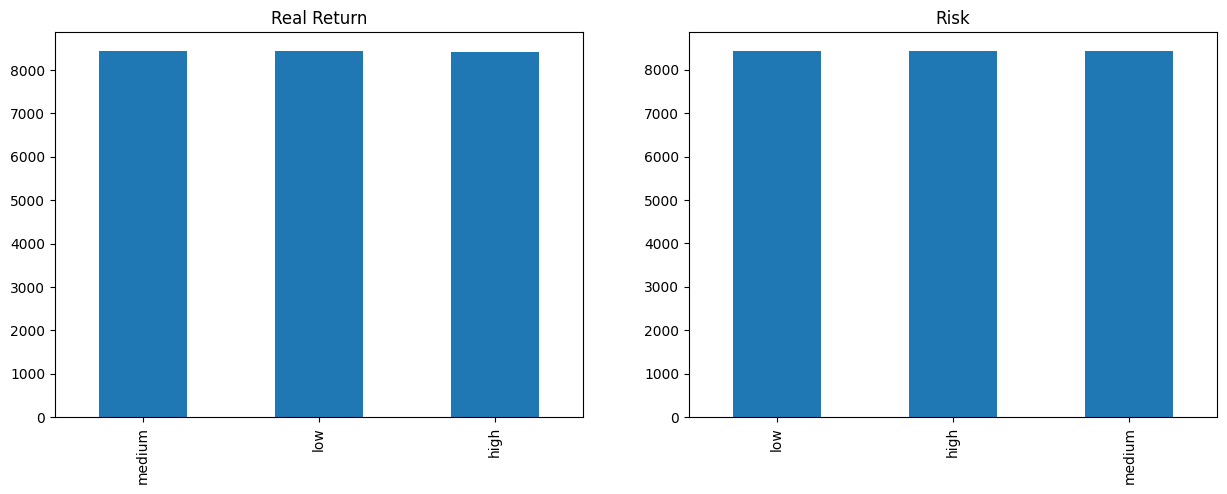

In [11]:
def plotResults(dataset:pd.DataFrame, title_1:str, title_2:str):
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_figwidth(15)
  fig.set_figheight(5)

  x = dataset[REAL_RETURN_CLASS].value_counts()
  x.plot.bar(ax=axes[0])
  axes[0].set_title(title_1)

  x = dataset[RISK_CLASS].value_counts()
  x.plot.bar(ax=axes[1])
  axes[1].set_title(title_2)

plotResults(dataset, "Real Return", "Risk")

In [12]:
dataset = dataset.replace(to_replace=[HIGH], value=2.0)
dataset = dataset.replace(to_replace=[MEDIUM], value=1.0)
dataset = dataset.replace(to_replace=[LOW], value=0.0)

dataset = dataset.replace(to_replace=[np.NaN], value=0.0)

dataset_X = dataset.drop(columns=[REAL_RETURN_CLASS, REAL_RETURN, RISK_CLASS, RISK, DATE])
dataset_y = dataset.drop(columns=DATA)

### Feature Selection

In [13]:
file.write("######## FEATURES ########")
file.write("\n")

1

In [14]:
run_start_date = dt.datetime.now()
file.write(f"\nSTART: {run_start_date}\n")

35

In [15]:
def readFeatures(typeFeature, typeClass, num):
	file = open(f'./feature_selection/files/{typeFeature}_{typeClass}.txt', 'r')
	result = []
	
	for feature in file:
		result.append(eval(str(feature)))
	    
	file.close()
    
	return result[:num]

#### Real Return

In [16]:
final_ranking_real_return = readFeatures(FEATURE_SELECTION, REAL_RETURN, N_FEATURES)

#### Risk

In [17]:
final_ranking_risk  = readFeatures(FEATURE_SELECTION, RISK, N_FEATURES)

In [18]:
def getColumnsRank(rank: list):
  ranking = []
  for column in rank:
    ranking.append(column[0])
    
  return ranking

In [19]:
features_real_return = getColumnsRank(final_ranking_real_return)[:N_FEATURES]
features_risk = getColumnsRank(final_ranking_risk)[:N_FEATURES]

In [20]:
file.write("REAL RETURN\n")
file.write(str(features_real_return))
file.write("\nRISK\n")
file.write(str(features_risk))


2078

### SSCA

O cálculo será feito com o número total de features ou somente com as 15 mais bem ranqueadas?

In [21]:

SSCAS = []

features_return = getColumnsRank(final_ranking_real_return)[:N_FEATURES]

#dataset_X = dataset.drop(columns=[REAL_RETURN_CLASS, REAL_RETURN, RISK_CLASS, RISK, "Date", "Company"])
dataset_X = dataset[features_return]
dataset_y = dataset.drop(columns=DATA)

dataset_X

,roi,roa,roe,return-on-tangible-equity,common-stock-net,asset-turnover,eps-earnings-per-share-diluted,eps-basic-net-earnings-per-share,long-term-debt,net-income,...,cash-flow-from-financial-activities,cost-goods-sold,revenue,change-in-accounts-payable,gross-profit,pre-paid-expenses,cash-flow-from-investing-activities,cash-on-hand,net-change-in-investments-total,cash-flow-from-operating-activities
0,12.7232,5.7810,33.4590,33.4590,62115.0,0.2467,1.20,1.20,94700.0,19442.0,...,-27445.0,47074.0,82959.0,-4358.0,35885.0,0.0,4234.0,48231.0,6953.0,22892.0
1,14.6496,7.1322,37.1074,37.1074,61181.0,0.2774,1.52,1.54,103323.0,25010.0,...,-28351.0,54719.0,97278.0,-21563.0,42559.0,0.0,-9265.0,51511.0,-6390.0,28166.0
2,19.3939,9.0847,48.1427,48.1427,58424.0,0.3252,2.10,2.11,106629.0,34630.0,...,-28159.0,69702.0,123945.0,19813.0,54243.0,0.0,-16106.0,63913.0,-12929.0,46966.0
3,11.9347,5.8550,32.5741,32.5741,57365.0,0.2375,1.23,1.25,109106.0,20551.0,...,-20382.0,48186.0,83360.0,14112.0,35174.0,0.0,835.0,62639.0,4352.0,20200.0
4,12.7882,6.5923,33.8270,33.8270,54989.0,0.2469,1.30,1.31,105752.0,21744.0,...,-29396.0,46179.0,81434.0,211.0,35255.0,0.0,3572.0,61696.0,5747.0,21094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25300,-8.8532,-7.1853,-8.8672,-14.4380,6.0,0.1443,-1.94,-1.94,0.0,-1124.0,...,823.0,1380.0,2257.0,0.0,877.0,0.0,18.0,2381.0,-2.0,81.0
25301,7.9541,5.9440,-7.3620,-7.1510,0.6,0.2773,1.07,1.08,1632.1,62.4,...,3.3,88.2,291.1,44.3,202.9,38.8,-5.3,292.3,0.0,32.8
25302,12.5711,9.5501,-8.2274,-7.9425,0.0,0.3293,1.38,1.38,1600.7,79.6,...,90.3,83.3,274.5,-6.8,191.2,24.6,-5.8,264.3,0.0,182.6
25303,17.9473,13.3532,17.9473,19.1251,0.0,0.3910,0.00,0.00,0.0,98.8,...,-134.5,85.4,289.3,3.9,203.9,20.9,-4.3,0.0,0.0,138.8


In [22]:
for cluster in range(2, 7):
  clusterer = KMeans(n_clusters=cluster, random_state=10)

  cluster_labels = clusterer.fit_predict(dataset_X)

  silhouette_values = silhouette_samples(dataset_X, cluster_labels)
  #silhouette_avg = silhouette_score(dataset_X, cluster_labels)

  sum_count = 0
  count_2 = 0

  #Primeiro somatorio
  for k in range(cluster):
    count = 0
    n_j = 0

    #Segundo somatorio
    for j in range(len(cluster_labels)):
      if cluster_labels[j] == k:
        n_j += 1
        count += silhouette_values[j]

    count_2 = (count/n_j)
    sum_count += count_2

  SSCA = (sum_count/cluster)
  SSCAS.append((cluster, round(SSCA, 2)))

SSCAS

[(2, 0.81), (3, 0.63), (4, 0.49), (5, 0.45), (6, 0.4)]

In [23]:
file.write("\n\n######## SSCAS ########\n\n")
file.write(str(SSCAS))
file.write("\n")

1

### Divisão do dataset

In [24]:
columns_dataset = DATA
columns_dataset.append(REAL_RETURN)
columns_dataset.append(RISK)
columns_dataset.append(REAL_RETURN_CLASS)
columns_dataset.append(RISK_CLASS)

df_train = None
df_test = None

df_train = pd.DataFrame(columns=columns_dataset)
df_test = pd.DataFrame(columns=columns_dataset)


In [25]:
# TRAINING_START_DATE =  dt.datetime.strptime('2009-03-31', "%Y-%m-%d")
# TRAINING_END_DATE =  dt.datetime.strptime('2018-03-31', "%Y-%m-%d")

# TEST_START_DATE =  dt.datetime.strptime('2018-06-30', "%Y-%m-%d")
# TEST_END_DATE =  dt.datetime.strptime('2022-03-31', "%Y-%m-%d")

# dataset_sort = dataset.sort_values(by=DATE)
# count_train = 0
# count_test = 0

# for index, row in dataset_sort.iterrows():
#   date = dt.datetime.strptime(row[DATE], "%Y-%m-%d")
#   if date.year < TEST_START_DATE.year:
#     df_train = df_train.append(row)
#     count_train +=1
#   elif date.year == TEST_START_DATE.year and date.month < TEST_START_DATE.month:
#     df_train = df_train.append(row)
#     count_train +=1
#   else:
#     df_test = df_test.append(row)
#     count_test += 1

# print(count_train)
# print(count_test)

# df_train = df_train.drop(columns=[REAL_RETURN, RISK, DATE])
# df_test = df_test.drop(columns=[REAL_RETURN, RISK, DATE])

# plotResults(df_train, "Real Return", "Risk")

# plotResults(df_test, "Real Return", "Risk")

# df_train.to_csv('./util/dataset_train.csv')
# df_test.to_csv('./util/dataset_test.csv')

In [26]:
df_train = pd.read_csv('./util/dataset_train.csv')
df_test = pd.read_csv('./util/dataset_test.csv')

##### Real Return

In [27]:
X_real_return_train = df_train[features_real_return]
y_real_return_train = df_train[REAL_RETURN_CLASS]

X_real_return_test = df_test[features_real_return]
y_real_return_test = df_test[REAL_RETURN_CLASS]

##### Risk

In [28]:
X_risk_train = df_train[features_risk]
y_risk_train = df_train[RISK_CLASS]

X_risk_test = df_test[features_risk]
y_risk_test = df_test[RISK_CLASS]

### Classificadores Únicos

In [29]:
file.write("\n######## CLASSIFICADORES UNICOS ########\n")

42

In [30]:
classifiers_real_return = {}
classifiers_risk = {}

#### Random Forest

##### Real Return

In [31]:
RANDOM_FOREST = 'RANDOM_FOREST'

randon_forest_return = RandomForestClassifier(n_estimators = 840, max_depth = 178, min_samples_split = 4, min_samples_leaf = 6, max_features = 'sqrt')
classifiers_real_return[RANDOM_FOREST] = randon_forest_return

randon_forest_return.fit(X_real_return_train, y_real_return_train)

result_randon_forest_return = randon_forest_return.score(X_real_return_test, y_real_return_test)
result_randon_forest_return

0.8409446921315821

##### Risk

In [32]:
randon_forest_risk = RandomForestClassifier(n_estimators = 622, max_depth = 70, min_samples_split = 3, min_samples_leaf = 9, max_features = 'log2')

classifiers_risk[RANDOM_FOREST] = randon_forest_risk
randon_forest_risk.fit(X_risk_train, y_risk_train)

result_randon_forest_risk = randon_forest_risk.score(X_risk_test, y_risk_test)
result_randon_forest_risk

0.5277744306542957

In [33]:
file.write(f"RANDOM FOREST:({result_randon_forest_return},{result_randon_forest_risk})\n")

54

#### SVM

##### Real Return

In [34]:
SVM = 'SVM'

svm_real_return = SVC(kernel = 'rbf', C = 99.94849891435051, class_weight = 'balanced')
classifiers_real_return[SVM] = svm_real_return

svm_real_return.fit(X_real_return_train, y_real_return_train)

result_svm_return = svm_real_return.score(X_real_return_test, y_real_return_test)
result_svm_return

0.730931437522593

##### Risk

In [35]:
svm_risk = SVC(kernel = 'rbf', C = 99.89489576327396, class_weight = 'balanced')
classifiers_risk[SVM] = svm_risk

svm_risk.fit(X_risk_train, y_risk_train)

result_svm_risk = svm_risk.score(X_risk_test, y_risk_test)
result_svm_risk

0.4417399686709242

In [36]:
file.write(f"SVM:({result_svm_return},{result_svm_risk})\n")

43

#### Decision Tree

##### Real Return

In [37]:
DECISION_TREE = 'DECISION_TREE'

decision_tree_real_return = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 10, min_samples_split = 1097)
classifiers_real_return[DECISION_TREE] = decision_tree_real_return

decision_tree_real_return.fit(X_real_return_train, y_real_return_train)

result_decision_return = decision_tree_real_return.score(X_real_return_test, y_real_return_test)
result_decision_return

0.8338354018556453

##### Risk

In [38]:
decision_tree_risk = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 133, min_samples_split = 919)
classifiers_risk[DECISION_TREE] = decision_tree_risk

decision_tree_risk.fit(X_risk_train, y_risk_train)

result_decision_risk = decision_tree_risk.score(X_risk_test, y_risk_test)
result_decision_risk

0.4741535124713821

In [39]:
file.write(f"DECISION TREE:({result_decision_return},{result_decision_risk})\n")

54

#### Rede Neural

##### Real Return

In [40]:
NEURAL_NETWORK = 'NEURAL_NETWORK'
neural_return = MLPClassifier(activation = 'logistic', solver = 'lbfgs', max_iter = 500, hidden_layer_sizes = (300,), learning_rate = 'constant')
classifiers_real_return[NEURAL_NETWORK] = neural_return

neural_return.fit(X_real_return_train, y_real_return_train)

result_neural_return = neural_return.score(X_real_return_test, y_real_return_test)
result_neural_return

0.6712856970719364

##### Risk

In [41]:
neural_risk = MLPClassifier(activation = 'logistic', solver = 'lbfgs', max_iter = 500, hidden_layer_sizes = (300,), learning_rate = 'constant')
classifiers_risk[NEURAL_NETWORK] = neural_risk

neural_risk.fit(X_risk_train, y_risk_train)

result_neural_risk = neural_risk.score(X_risk_test, y_risk_test)
result_neural_risk

0.443667911796602

In [42]:
file.write(f"NEURAL NETWORK:({result_neural_return},{result_decision_risk})\n")

55

#### Regressão Logística

##### Real Return

In [43]:
LOGISTIC_REGRESSION ='LOGISTIC_REGRESSION'

rl_return = LogisticRegression(penalty = 'l2', C = 48.72671442481355, class_weight = 'balanced', solver = 'lbfgs', max_iter = 97847, n_jobs=-1)
classifiers_real_return[LOGISTIC_REGRESSION] = rl_return

rl_return.fit(X_real_return_train, y_real_return_train)

result_rl_return = rl_return.score(X_real_return_test, y_real_return_test)
result_rl_return

/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8116640559103506

##### Risk

In [44]:
rl_risk = LogisticRegression(penalty = 'l2', C = 48.72671442481355, class_weight = 'balanced', solver = 'lbfgs', max_iter = 97847, n_jobs=-1)
classifiers_risk[LOGISTIC_REGRESSION] = rl_risk

rl_risk.fit(X_risk_train, y_risk_train)

result_rl_risk = rl_risk.score(X_risk_test, y_risk_test)
result_rl_risk

/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.453307627424991

In [45]:
file.write(f"LOGISTIC REGRESSION:({result_rl_return},{result_rl_risk})\n")

59

#### XGboost

##### Real Return

In [46]:
XG_BOOST = 'XG_BOOST'

xg_boost_return = xgboost.XGBClassifier()
classifiers_real_return[XG_BOOST] = xg_boost_return

xg_boost_return.fit(X_real_return_train, y_real_return_train)

result_xgboost_result = xg_boost_return.score(X_real_return_test, y_real_return_test)
result_xgboost_result

0.830581997831064

##### Risk

In [47]:
xg_boost_risk = xgboost.XGBClassifier()
classifiers_risk[XG_BOOST] = xg_boost_risk

xg_boost_risk.fit(X_risk_train, y_risk_train)

result_xgboost_risk = xg_boost_risk.score(X_risk_test, y_risk_test)
result_xgboost_risk

0.5133148572117122

In [48]:
file.write(f"XGBOOST:({result_xgboost_result},{result_xgboost_risk})\n")

47

### Cross-validation

In [49]:
CV = 10
result_cv_real_return = {}
result_cv_risk = {}

X_dataset_real_return = dataset[features_real_return]
y_dataset_real_return = dataset[REAL_RETURN_CLASS]

X_dataset_risk = dataset[features_risk]
y_dataset_risk = dataset[RISK_CLASS]

##### Real Return

In [50]:
cv_result = cross_val_score(classifiers_real_return[RANDOM_FOREST], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[RANDOM_FOREST] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[SVM], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[SVM] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[DECISION_TREE], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[DECISION_TREE] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[NEURAL_NETWORK], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[NEURAL_NETWORK] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[LOGISTIC_REGRESSION], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[LOGISTIC_REGRESSION] = cv_result.mean()

cv_result = cross_val_score(classifiers_real_return[XG_BOOST], X_dataset_real_return, y_dataset_real_return, cv=CV, n_jobs=-1)
result_cv_real_return[XG_BOOST] = cv_result.mean()

result_cv_real_return

/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_mult

{'RANDOM_FOREST': 0.8122512778307875,
 'SVM': 0.6457186226756597,
 'DECISION_TREE': 0.8323642641521809,
 'NEURAL_NETWORK': 0.7007704776971092,
 'LOGISTIC_REGRESSION': 0.7711494620851638,
 'XG_BOOST': 0.7789013075804686}

##### Risk

In [51]:
cv_result = cross_val_score(classifiers_risk[RANDOM_FOREST], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[RANDOM_FOREST] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[SVM], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[SVM] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[DECISION_TREE], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[DECISION_TREE] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[NEURAL_NETWORK], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[NEURAL_NETWORK] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[LOGISTIC_REGRESSION], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[LOGISTIC_REGRESSION] = cv_result.mean()

cv_result = cross_val_score(classifiers_risk[XG_BOOST], X_dataset_risk, y_dataset_risk, cv=CV, n_jobs=-1)
result_cv_risk[XG_BOOST] = cv_result.mean()

result_cv_risk

/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_mult

{'RANDOM_FOREST': 0.4699842272032333,
 'SVM': 0.4037129319755194,
 'DECISION_TREE': 0.46698403824200474,
 'NEURAL_NETWORK': 0.44465428684314495,
 'LOGISTIC_REGRESSION': 0.4286092765908271,
 'XG_BOOST': 0.4632265051698855}

In [52]:
file.write("\n######## CV ########\n")
file.write(f"Real Return: {result_cv_real_return}\n")
file.write(f"Risk: {result_cv_risk}\n")

223

### Selection Of Cassifier

#### List of Sets

In [53]:
classifiers = list(result_cv_real_return.keys())
list_sets = []

for i in range(len(classifiers)):
  for j in range(i + 1, len(classifiers)):
    list_sets.append((classifiers[i], classifiers[j]))

list_sets


[('RANDOM_FOREST', 'SVM'),
 ('RANDOM_FOREST', 'DECISION_TREE'),
 ('RANDOM_FOREST', 'NEURAL_NETWORK'),
 ('RANDOM_FOREST', 'LOGISTIC_REGRESSION'),
 ('RANDOM_FOREST', 'XG_BOOST'),
 ('SVM', 'DECISION_TREE'),
 ('SVM', 'NEURAL_NETWORK'),
 ('SVM', 'LOGISTIC_REGRESSION'),
 ('SVM', 'XG_BOOST'),
 ('DECISION_TREE', 'NEURAL_NETWORK'),
 ('DECISION_TREE', 'LOGISTIC_REGRESSION'),
 ('DECISION_TREE', 'XG_BOOST'),
 ('NEURAL_NETWORK', 'LOGISTIC_REGRESSION'),
 ('NEURAL_NETWORK', 'XG_BOOST'),
 ('LOGISTIC_REGRESSION', 'XG_BOOST')]

#### Real Return Classifiers

In [54]:
real_return_classifiers = []

for classifier_set in list_sets:  
  set_0 = result_cv_real_return[classifier_set[0]]
  set_1 = result_cv_real_return[classifier_set[1]]

  avg = (set_0 + set_1) / 2
  if avg >= 0.75:
    if classifier_set[0] not in real_return_classifiers:
      real_return_classifiers.append(classifier_set[0])

    if classifier_set[1] not in real_return_classifiers:
      real_return_classifiers.append(classifier_set[1])

real_return_classifiers


['RANDOM_FOREST',
 'DECISION_TREE',
 'NEURAL_NETWORK',
 'LOGISTIC_REGRESSION',
 'XG_BOOST']

#### Risk Classifiers

In [55]:
risk_classifiers = []

for classifier_set in list_sets:  
  set_0 = result_cv_risk[classifier_set[0]]
  set_1 = result_cv_risk[classifier_set[1]]

  avg = (set_0 + set_1) / 2
  if avg >= 0.45:
    if classifier_set[0] not in risk_classifiers:
      risk_classifiers.append(classifier_set[0])

    if classifier_set[1] not in risk_classifiers:
      risk_classifiers.append(classifier_set[1])

risk_classifiers

['RANDOM_FOREST', 'DECISION_TREE', 'NEURAL_NETWORK', 'XG_BOOST']

In [56]:
file.write("\n######## CLASSIFIERS SELECTION ########\n")
file.write(f"Real Return: {real_return_classifiers}\n")
file.write(f"Risk: {risk_classifiers}\n")

71

### Fusion of Classifiers

#### Training with diversification

##### Whitout diversity

In [57]:
file.write("\n######## WHITOUT DIVERSITY ########\n")

37

Real Return

In [58]:
real_return_whitout_diversity = {}

for classifier in real_return_classifiers:
  real_return_whitout_diversity[classifier] = classifiers_real_return[classifier]
  real_return_whitout_diversity[classifier].fit(X_real_return_train, y_real_return_train)

  file.write(f"Real Return: {classifier}, {real_return_whitout_diversity[classifier].score(X_real_return_test, y_real_return_test)}\n")
  print(classifier, real_return_whitout_diversity[classifier].score(X_real_return_test, y_real_return_test))

RANDOM_FOREST 0.8414266779130015
DECISION_TREE 0.8338354018556453
NEURAL_NETWORK 0.6559826485118689


/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC_REGRESSION 0.8116640559103506
XG_BOOST 0.830581997831064


Risk

In [59]:
risk_whitout_diversity = {}

for classifier in risk_classifiers:
  risk_whitout_diversity[classifier] = classifiers_risk[classifier]
  risk_whitout_diversity[classifier].fit(X_risk_train, y_risk_train)

  file.write(f"Risk: {classifier}, {risk_whitout_diversity[classifier].score(X_risk_test, y_risk_test)}\n")
  print(classifier, risk_whitout_diversity[classifier].score(X_risk_test, y_risk_test))

RANDOM_FOREST 0.5265694662007471
DECISION_TREE 0.4741535124713821
NEURAL_NETWORK 0.4439089046873117
XG_BOOST 0.5133148572117122


##### Bagging

In [60]:
file.write("\n######## BAGGING ########\n")

27

Real Return

In [61]:
real_return_bagging = {}
count = 0
for classifier in real_return_classifiers:
  estimator = classifiers_real_return[classifier]
  real_return_bagging[classifier] = BaggingClassifier(estimator=estimator, n_jobs=-1)
  real_return_bagging[classifier].fit(X_real_return_train, y_real_return_train)

  file.write(f"Real Return: {classifier}, {real_return_bagging[classifier].score(X_real_return_test, y_real_return_test)}\n")
  print(classifier, real_return_bagging[classifier].score(X_real_return_test, y_real_return_test))
  

RANDOM_FOREST 0.8398602241233883
DECISION_TREE 0.8352813591999037


/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_mult

NEURAL_NETWORK 0.6516447764790939


/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

LOGISTIC_REGRESSION 0.8161224243884806
XG_BOOST 0.8393782383419689


Risk

In [62]:
risk_bagging = {}

for classifier in risk_classifiers:
  estimator = classifiers_risk[classifier]
  risk_bagging[classifier] = BaggingClassifier(estimator=estimator, n_jobs=-1)
  risk_bagging[classifier].fit(X_risk_train, y_risk_train)

  file.write(f"Risk: {classifier}, {risk_bagging[classifier].score(X_risk_test, y_risk_test)}\n")
  print(classifier, risk_bagging[classifier].score(X_risk_test, y_risk_test))

RANDOM_FOREST 0.5206651403783589
DECISION_TREE 0.4852391854440294


/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/neural_network/_mult

NEURAL_NETWORK 0.44258344378840825
XG_BOOST 0.5280154235450054


##### AdaBoost

In [63]:
file.write("\n######## ADABOOST ########\n")

28

Real Return

In [64]:
real_return_adaboost = {}

for classifier in real_return_classifiers:
  estimator = classifiers_real_return[classifier]
  try:
    real_return_adaboost[classifier] = AdaBoostClassifier(estimator=estimator)
    real_return_adaboost[classifier].fit(X_real_return_train, y_real_return_train)
    file.write(f"RealReturn: {classifier}, {real_return_adaboost[classifier].score(X_real_return_test, y_real_return_test)}\n")
    print(classifier, real_return_adaboost[classifier].score(X_real_return_test, y_real_return_test))
  except:
    real_return_adaboost.pop(classifier)
    print(classifier, "Não utilizado")


RANDOM_FOREST 0.8399807205687432
DECISION_TREE 0.7847933485962164
NEURAL_NETWORK Não utilizado


/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iuryfaria/Documents/cefet/TCC2/tcc-mcs/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

LOGISTIC_REGRESSION 0.646222436438125
XG_BOOST 0.3214845162067719


Risk

In [65]:
risk_adaboost = {}

for classifier in risk_classifiers:
  estimator = classifiers_risk[classifier]
  try:
    risk_adaboost[classifier] = AdaBoostClassifier(estimator=estimator)
    risk_adaboost[classifier].fit(X_risk_train, y_risk_train)
    file.write(f"Risk: {classifier}, {risk_adaboost[classifier].score(X_risk_test, y_risk_test)}\n")
    print(classifier, risk_adaboost[classifier].score(X_risk_test, y_risk_test))
  except:
    risk_adaboost.pop(classifier)
    print(classifier, "Não utilizado")

RANDOM_FOREST 0.5260874804193276
DECISION_TREE 0.4688516688757682
NEURAL_NETWORK Não utilizado
XG_BOOST 0.30075912760573564


#### Fusion

In [66]:
model_fusion = xgboost.XGBClassifier()
model_fusion_name = XG_BOOST

In [67]:
file.write("\n######## FUSION ########\n")

26

In [68]:
def fusion(fusion_model, models, X_data, y_data):
  df_fusion = pd.DataFrame()

  for model in models:
    X_predict = models[model].predict(X_data)
  
    df_fusion[model] = X_predict

  X_train, X_test, y_train, y_test = train_test_split(df_fusion, y_data, test_size=0.3, random_state=42)

  print(X_train)
  fusion_model.fit(X_train, y_train)
  
  return fusion_model.score(X_test, y_test)

##### Whitout diversity

Real Return

In [69]:
whiout_return = fusion(model_fusion, real_return_whitout_diversity, X_dataset_real_return, y_dataset_real_return)
whiout_return

       RANDOM_FOREST  DECISION_TREE  NEURAL_NETWORK  LOGISTIC_REGRESSION  \
12914            0.0            0.0             0.0                  0.0   
2968             1.0            1.0             2.0                  1.0   
6603             0.0            0.0             0.0                  0.0   
11423            2.0            2.0             2.0                  2.0   
20901            0.0            0.0             0.0                  0.0   
...              ...            ...             ...                  ...   
21575            2.0            2.0             2.0                  2.0   
5390             1.0            1.0             1.0                  1.0   
860              1.0            1.0             1.0                  1.0   
15795            1.0            1.0             1.0                  1.0   
23654            2.0            2.0             2.0                  2.0   

       XG_BOOST  
12914         0  
2968          1  
6603          0  
11423         2

0.9366438356164384

Risk

In [70]:
if len(risk_classifiers) > 0:
  whiout_risk = fusion(model_fusion, risk_whitout_diversity, X_dataset_risk, y_dataset_risk)
  whiout_risk

       RANDOM_FOREST  DECISION_TREE  NEURAL_NETWORK  XG_BOOST
12914            1.0            0.0             0.0         1
2968             2.0            1.0             2.0         2
6603             0.0            2.0             0.0         0
11423            2.0            2.0             2.0         2
20901            0.0            1.0             0.0         0
...              ...            ...             ...       ...
21575            1.0            2.0             2.0         1
5390             1.0            0.0             1.0         2
860              1.0            0.0             0.0         0
15795            0.0            0.0             0.0         0
23654            2.0            2.0             2.0         2

[17713 rows x 4 columns]


In [71]:
file.write(f"[WHITOUT] [{model_fusion_name}] RealReturn: {whiout_return}\n")
file.write(f"[WHITOUT] [{model_fusion_name}] Risk: {whiout_risk}\n") if len(risk_classifiers) > 0 else file.write(f"[WHITOUT] [{model_fusion_name}] Risk: -\n")

45

##### Bagging

Real Return

In [72]:
bagging_return = fusion(model_fusion, real_return_bagging, X_dataset_real_return, y_dataset_real_return)
bagging_return

       RANDOM_FOREST  DECISION_TREE  NEURAL_NETWORK  LOGISTIC_REGRESSION  \
12914            0.0            0.0             0.0                  0.0   
2968             1.0            1.0             2.0                  1.0   
6603             0.0            0.0             0.0                  0.0   
11423            2.0            2.0             2.0                  2.0   
20901            0.0            0.0             0.0                  0.0   
...              ...            ...             ...                  ...   
21575            2.0            2.0             2.0                  2.0   
5390             1.0            1.0             1.0                  1.0   
860              1.0            1.0             1.0                  1.0   
15795            1.0            1.0             1.0                  1.0   
23654            2.0            2.0             2.0                  2.0   

       XG_BOOST  
12914       0.0  
2968        2.0  
6603        0.0  
11423       2.0

0.9279504741833509

Risk

In [73]:
if len(risk_classifiers) > 0:
  bagging_risk = fusion(model_fusion, risk_bagging, X_dataset_risk, y_dataset_risk)
  bagging_risk

       RANDOM_FOREST  DECISION_TREE  NEURAL_NETWORK  XG_BOOST
12914            1.0            0.0             0.0       1.0
2968             2.0            2.0             2.0       2.0
6603             0.0            0.0             0.0       0.0
11423            2.0            2.0             2.0       2.0
20901            0.0            0.0             0.0       0.0
...              ...            ...             ...       ...
21575            1.0            2.0             2.0       1.0
5390             0.0            1.0             1.0       0.0
860              0.0            1.0             0.0       0.0
15795            0.0            0.0             0.0       0.0
23654            2.0            2.0             2.0       2.0

[17713 rows x 4 columns]


In [74]:
file.write(f"[BAGGING] [{model_fusion_name}] RealReturn: {bagging_return}\n")
file.write(f"[BAGGING] [{model_fusion_name}] Risk: {bagging_risk}\n") if len(risk_classifiers) > 0 else file.write(f"[BAGGING] [{model_fusion_name}] Risk: -\n")

46

##### AdaBoost

Real Return

In [75]:
ada_return = fusion(model_fusion, real_return_adaboost, X_dataset_real_return, y_dataset_real_return)
ada_return

       RANDOM_FOREST  DECISION_TREE  LOGISTIC_REGRESSION  XG_BOOST
12914            0.0            0.0                  0.0       0.0
2968             2.0            2.0                  2.0       0.0
6603             0.0            0.0                  0.0       0.0
11423            2.0            2.0                  2.0       0.0
20901            0.0            0.0                  0.0       0.0
...              ...            ...                  ...       ...
21575            2.0            2.0                  2.0       0.0
5390             2.0            2.0                  2.0       0.0
860              1.0            1.0                  0.0       0.0
15795            1.0            1.0                  0.0       0.0
23654            2.0            2.0                  2.0       0.0

[17713 rows x 4 columns]


0.9365121180189674

Risk

In [76]:
if len(risk_classifiers) > 0:
  ada_risk = fusion(model_fusion, risk_adaboost, X_dataset_risk, y_dataset_risk)
  ada_risk

       RANDOM_FOREST  DECISION_TREE  XG_BOOST
12914            1.0            0.0       0.0
2968             2.0            2.0       0.0
6603             0.0            0.0       0.0
11423            2.0            2.0       0.0
20901            0.0            0.0       0.0
...              ...            ...       ...
21575            1.0            1.0       0.0
5390             2.0            2.0       0.0
860              1.0            1.0       0.0
15795            0.0            0.0       0.0
23654            2.0            2.0       0.0

[17713 rows x 3 columns]


In [77]:
file.write(f"[ADABOOST] [{model_fusion_name}] RealReturn: {ada_return}\n")
file.write(f"[ADABOOST] [{model_fusion_name}] Risk: {ada_risk}\n") if len(risk_classifiers) > 0 else file.write(f"[ADABOOST] [{model_fusion_name}] Risk: -\n")

47

In [78]:
run_end_date = dt.datetime.now()
file.write(f"\nEND: {run_end_date}")
file.write(f"\nTOTAL EXEC: {run_end_date-run_start_date}")

file.close()